In [155]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

url = 'https://raw.githubusercontent.com/jvan12s/Data-Science-und-KI-Portfolio/refs/heads/main/projects/project_1/cardiac%20arrest%20dataset.csv'

In [156]:
#Übersicht Features
df_features = pd.DataFrame({
    'Abkürzung': ['age','sex','cp_type','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope'],
    'Begriff': ['Age','Sex','Chest Pain Type','Resting Blood Pressure','Serum Cholesterol','Fasting Blood Sugar','Resting ECG Results','Max Heart Rate Achieved','Exercise-Induced Angina','ST Depression (Oldpeak)','ST Slope'],
})
display(df_features.style.set_caption("Übersicht Features"))

,Abkürzung,Begriff
0,age,Age
1,sex,Sex
2,cp_type,Chest Pain Type
3,trestbps,Resting Blood Pressure
4,chol,Serum Cholesterol
5,fbs,Fasting Blood Sugar
6,restecg,Resting ECG Results
7,thalach,Max Heart Rate Achieved
8,exang,Exercise-Induced Angina
9,oldpeak,ST Depression (Oldpeak)


In [157]:
#Datensatz über Github Repo einlesen
df = pd.read_csv(url)
#Erste Grundattribute der Daten anzeigen
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [158]:
#Datentransformation und -Bereinigung
df.rename(columns={'cp': 'cp_type'}, inplace=True)
df.isnull().sum() #0 Nullwerte in den Features
# In diesem Fall hatte der gegebene Datensatz schon eine hohe Datenqualität
df.head()

,age,sex,cp_type,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


Korrelation von age mit Target: -0.23
Korrelation von sex mit Target: -0.28
Korrelation von cp_type mit Target: 0.43
Korrelation von trestbps mit Target: -0.14
Korrelation von chol mit Target: -0.10
Korrelation von fbs mit Target: -0.04
Korrelation von restecg mit Target: 0.13
Korrelation von thalach mit Target: 0.42
Korrelation von exang mit Target: -0.44
Korrelation von oldpeak mit Target: -0.44
Korrelation von slope mit Target: 0.35
Korrelation von ca mit Target: -0.38
Korrelation von thal mit Target: -0.34


<Axes: >

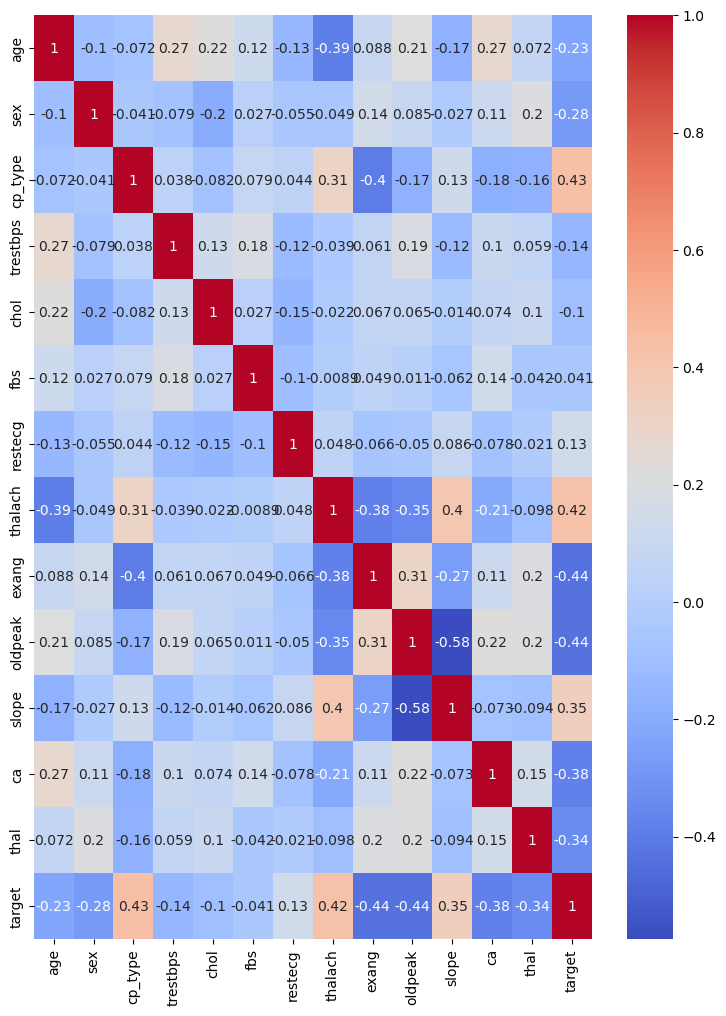

In [159]:
# Ermittlung der Korrelationen von den Features
correlations = {}

for col in df.columns:
    if col != 'target':  # nur Features, nicht das Target selbst
        corr = df[col].corr(df['target'])
        correlations[col] = corr
        print(f"Korrelation von {col} mit Target: {corr:.2f}")

import seaborn as sns
plt.figure(figsize=(9,12))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

<h1>Visuelle Analyse der Features mit den höchsten Corr-Werten gegenüber 'target'</h1>

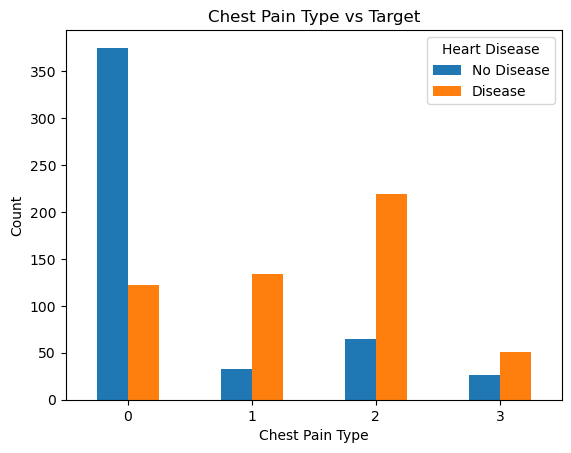

In [160]:
#Feature 1 (corr von 0.43) cp_type vs target: 
cp_counts = df.groupby(['cp_type', 'target']).size().unstack(fill_value=0)

# Plotting
cp_counts.plot(kind='bar')
plt.title('Chest Pain Type vs Target')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Heart Disease', labels=['No Disease', 'Disease'])
plt.show()

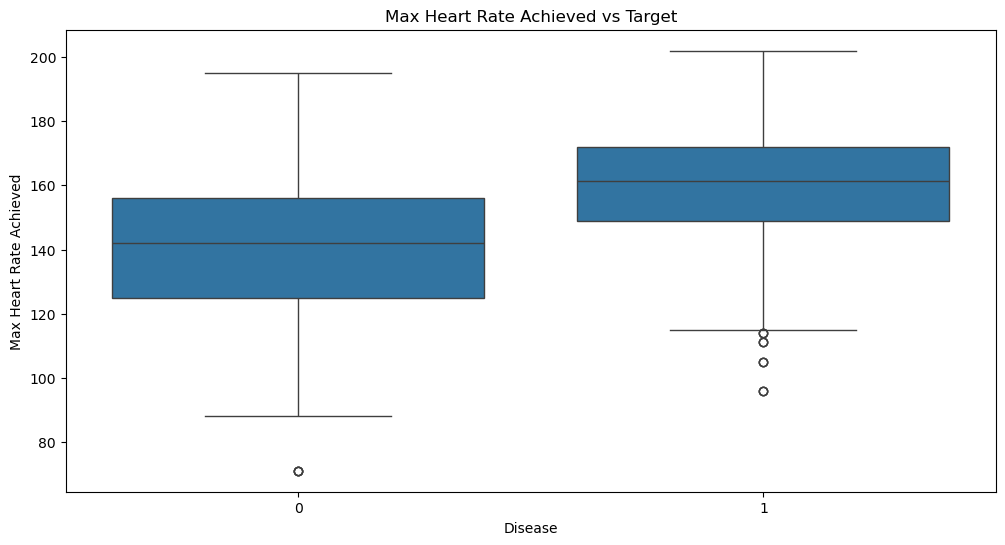

In [161]:
#Feature 2 (corr von 0.42) max heart rate vs target: 
plt.figure(figsize=(12, 6))
sns.boxplot(x='target', y='thalach', data=df)
plt.title('Max Heart Rate Achieved vs Target')
plt.xlabel('Disease')
plt.ylabel('Max Heart Rate Achieved')
plt.show()

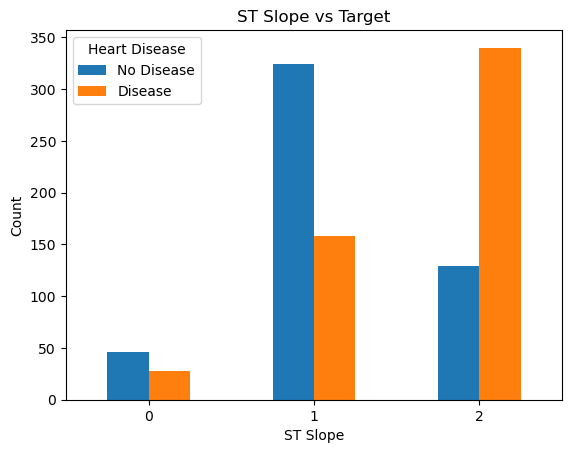

In [162]:
#Feature 3 (corr von 0.35) slope vs target: 
cp_counts = df.groupby(['slope', 'target']).size().unstack(fill_value=0)

# Plotting
cp_counts.plot(kind='bar')
plt.title('ST Slope vs Target')
plt.xlabel('ST Slope')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Heart Disease', labels=['No Disease', 'Disease'])
plt.show()

In [163]:
#Normalisierung der Daten; Standardscaler für numerische Werte und OrdinalEncoder für kategorische Werte
from sklearn.preprocessing import StandardScaler, OrdinalEncoder

#Aufteilung in verschiedene Arten von Spalten
num_col = ['age','trestbps','chol','thalach','oldpeak']
cat_col_ordinal = ['cp_type', 'restecg', 'slope','ca','thal']

scaler = StandardScaler()
Ord = OrdinalEncoder()

#Kodiere ordiniale kategorische Spalten
df[cat_col_ordinal] = Ord.fit_transform(df[cat_col_ordinal])

#Normalsiere numerische Werte erstmals
df[num_col] = scaler.fit_transform(df[num_col])

#Normalisiere aller Spalten, um höhere Gewichtungen der kategorischen Spalten auszugleichen und alle Spalten zusammen zu normalisieren
norm = num_col + cat_col_ordinal
df[norm] = scaler.fit_transform(df[norm])

#Fehlversuch, da Gewichtungen der ordinalen Spalten zu groß war
#encoder = [scaler,Ord]
#col_encod = [num_col,cat_col_ordinal]
#for e in range(len(encoder)):
 #   for c in col_encod[e]:
  #      df[col_encod[e]] = encoder[e].fit_transform(df[col_encod[e]])
        
df.head()

,age,sex,cp_type,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,-0.268437,1,-0.915755,-0.377636,-0.659332,0,0.891255,0.821321,0,-0.060888,0.995433,1.209221,1.089852,0
1,-0.158157,1,-0.915755,0.479107,-0.833861,1,-1.004049,0.255968,1,1.727137,-2.243675,-0.731971,1.089852,0
2,1.716595,1,-0.915755,0.764688,-1.396233,0,0.891255,-1.048692,1,1.301417,-2.243675,-0.731971,1.089852,0
3,0.724079,1,-0.915755,0.936037,-0.833861,0,0.891255,0.516900,0,-0.912329,0.995433,0.238625,1.089852,0
4,0.834359,0,-0.915755,0.364875,0.930822,1,0.891255,-1.874977,0,0.705408,-0.624121,2.179817,-0.522122,0


<h2>Analyse mit Hilfe der Logistischen Regressions Funktion:</h2>

Vorhersage Accuracy Score: 0.7951219512195122
Report anderer Metriken: 
               precision    recall  f1-score   support

           0       0.72      0.85      0.78        86
           1       0.87      0.76      0.81       119

    accuracy                           0.80       205
   macro avg       0.79      0.80      0.79       205
weighted avg       0.81      0.80      0.80       205



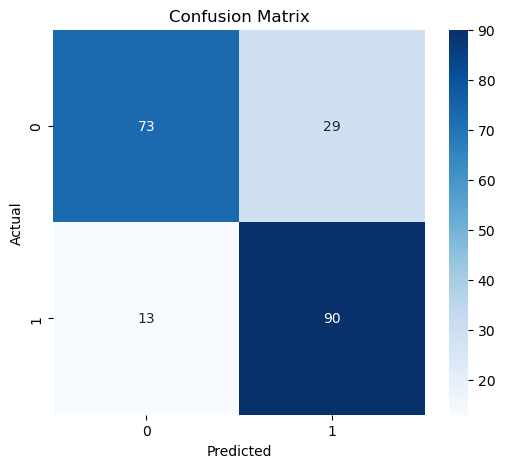

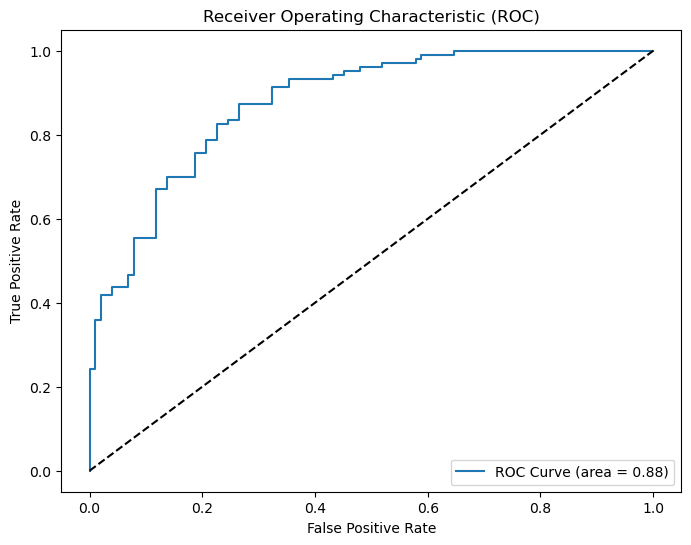

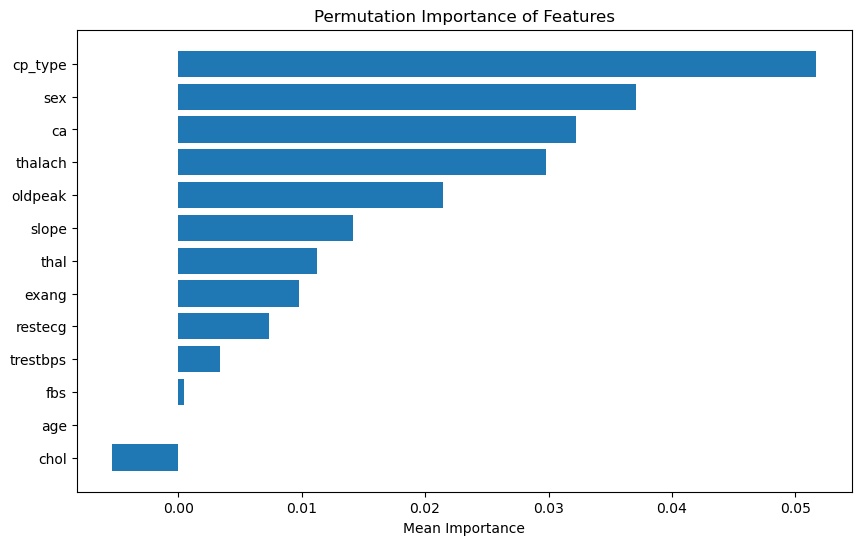

In [164]:
#Für ML Models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, classification_report
from sklearn.inspection import permutation_importance

# X für Daten(normalisiert) ohne 'target' , y für Daten nur aus 'target'
X = df.drop('target', axis=1)
y = df['target']

# Aufteilen des Datensatzes in Trainings- und Test-Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initalisierung und Training des Modells
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

# Vorhersage unter Nutzung des Test-sets
y_pred = log_model.predict(X_test)

# Berechnung der Accuracy
acc = accuracy_score(y_pred, y_test)
report = classification_report(y_pred, y_test)
print('Vorhersage Accuracy Score:', acc)
print('Report anderer Metriken: \n', report)

# Erstellung und Visualisierung einer Konfusionsmatrix 
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Erstellung einer Receiver Operating Characteristic (ROC) Kurve und des Area under curve(AUC) Wertes
y_prob = log_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

# Permutationen visualisieren, um Feature Relevanz zu erforschen
result = permutation_importance(log_model, X_test, y_test, n_repeats=10, random_state=42)
sorted_idx = result.importances_mean.argsort()

plt.figure(figsize=(10, 6))
plt.barh(X.columns[sorted_idx], result.importances_mean[sorted_idx])
plt.xlabel('Mean Importance')
plt.title('Permutation Importance of Features')
plt.show()

<h2>Weitere Analyse mit Hilfe der RandomForest Funktion:</h2>

Vorhersage Accuracy Score: 0.9853658536585366
Report anderer Metriken für Klassifikation 
               precision    recall  f1-score   support

           0       1.00      0.97      0.99       105
           1       0.97      1.00      0.99       100

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



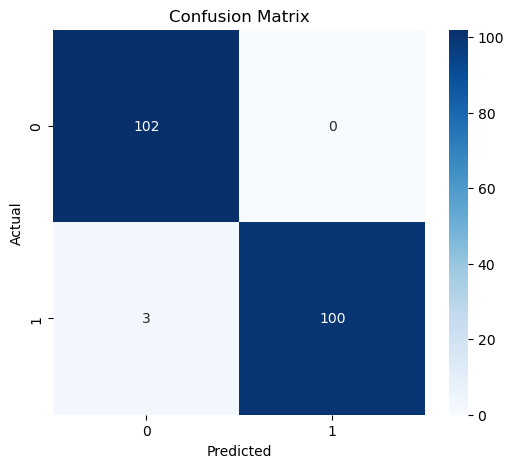

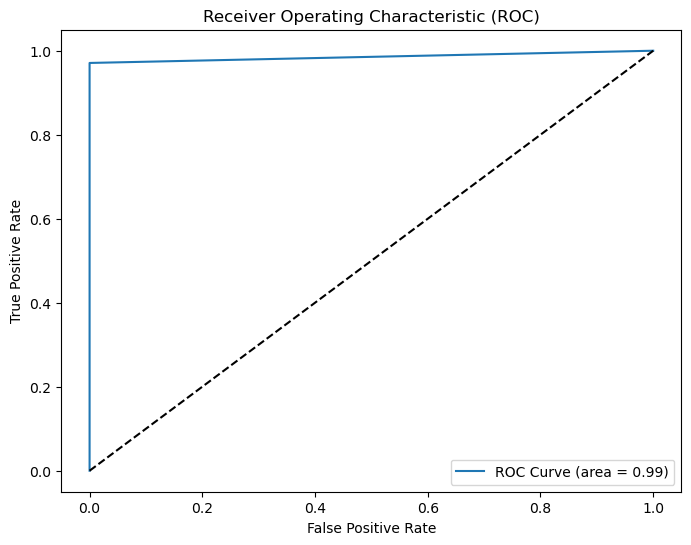

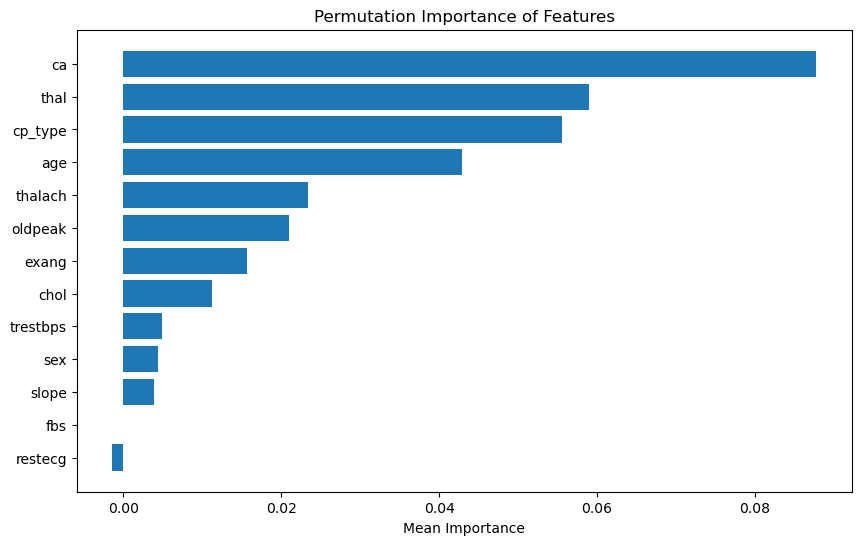

In [165]:
from sklearn.ensemble import RandomForestClassifier

rand = RandomForestClassifier()
X = df.drop('target', axis=1)
y = df['target']

# Aufteilen des Datensatzes in Trainings- und Test-Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rand.fit(X_train,y_train)

pred_rand = rand.predict(X_test)

# Berechnung der Accuracy
acc = accuracy_score(pred_rand, y_test)
report = classification_report(pred_rand, y_test)
print('Vorhersage Accuracy Score:', acc)
print('Report anderer Metriken für Klassifikation \n', report)

# Generate and display the confusion matrix
cm = confusion_matrix(y_test, pred_rand)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Erstellung einer Receiver Operating Characteristic (ROC) Kurve und des Area under curve(AUC) Wertes
y_prob = rand.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, pred_rand)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

# Permutationen visualisieren, um Feature Relevanz zu erforschen
result = permutation_importance(rand, X_test, y_test, n_repeats=10, random_state=42)
sorted_idx = result.importances_mean.argsort()

plt.figure(figsize=(10, 6))
plt.barh(X.columns[sorted_idx], result.importances_mean[sorted_idx])
plt.xlabel('Mean Importance')
plt.title('Permutation Importance of Features')
plt.show()

<h1>Ergebnisse:</h1>

Im Klassifikationsprojekt zur Vorhersage von Herzstillständen bei Patienten wurde die Zielvariable mit zwei verschiedenen Algorithmen vorhergesagt: Logistische Regression und Random Forest. Die Leistung beider Modelle wurde im Hinblick auf Präzision (Accuracy) und praktische Anwendbarkeit bewertet.

<h3>Random Forest</h3>
Präzision: Fast perfekte 99 %.

Vorteil: Erkennt komplexe Muster und erzielt sehr hohe Vorhersagegenauigkeit.

Nachteil: Die Entscheidungsprozesse des Random Forest sind schwer nachvollziehbar („Black-Box“). Es ist kaum möglich, die genauen Gründe für einzelne Vorhersagen oder die Bedeutung einzelner Features schlüssig zu erklären.

<h3>Logistische Regression</h3>
Präzision: Etwa 80 %.

Vorteil: Die logistische Regression liefert nachvollziehbare Ergebnisse. Die Gewichtung der einzelnen Features im Modell orientiert sich direkt an deren Korrelation mit der Zielvariable. So kann genau erklärt und verstanden werden, wie jede Variable zum Endergebnis beiträgt.

Nachteil: Die Genauigkeit ist niedriger als beim Random Forest, das Modell ist unter Umständen weniger flexibel bei sehr komplexen Mustern.

Fazit und Empfehlung
Random Forest überzeugt mit sehr hoher Präzision, ist jedoch kaum interpretierbar. Für Anwendungen, bei denen allein das bestmögliche Vorhersageergebnis zählt (und die Nachvollziehbarkeit keine große Rolle spielt), wäre dieses Modell geeignet.

Logistische Regression ist zwar weniger präzise, punktet aber in der Praxis oft durch bessere Interpretierbarkeit und größere Transparenz. In datengetriebenen Projekten, in denen es wichtig ist, Entscheidungswege nachvollziehbar darzustellen und Ergebnissen zu vertrauen, ist die logistische Regression häufig das praktisch sinnvollere Modell.

Insgesamt ist es oft eine Frage des Anwendungskontexts, welches Modell optimal ist: Transparenz und Erklärbarkeit sprechen für die logistische Regression, während eine maximale Präzision für den Einsatz des Random Forest spricht. In vielen Fällen ist es sinnvoll, beide Modelle gemeinsam zu betrachten und die Ergebnisse gegenüberzustellen.

<h3>Empfehlung:</h3>
Für diesen Anwendungsfall empfiehlt es sich, das Modell zu wählen, bei dem ein gutes Gleichgewicht zwischen Genauigkeit und Erklärbarkeit erreicht wird – häufig ist das, trotz etwas geringerer Präzision, die logistische Regression.